# Content-based Music Recommendation System using KNN Algorithm

## Import the Libraries

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import json
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## Data Cleaning and Manipulation

In [2]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_colwidth', None)  # Show full column width

In [3]:
genre = pd.read_csv("C:/Users/Ng Yong Jian/OneDrive - Nanyang Technological University/Desktop/NTU/Y3S1/SC4020 Data Analytics & Mining/Assignment/Assignment1/genre_train_trimmed.csv", dtype='float16')
genre.fillna(0, inplace=True)
genre = genre.astype('int8')
genre.head()

,genres_0,genres_87,genres_94,genres_95,genres_102,genres_109,genres_118,genres_125,genres_132,genres_139,genres_152,genres_159,genres_166,genres_177,genres_184,genres_191,genres_198,genres_205,genres_212,genres_242,genres_252,genres_275,genres_282,genres_289,genres_296,genres_303,genres_310,genres_317,genres_324,genres_331,genres_338,genres_352,genres_359,genres_367,genres_374,genres_381,genres_388,genres_402,genres_409,genres_416,genres_423,genres_430,genres_437,genres_444,genres_451,genres_458,genres_465,genres_474,genres_481,genres_488,genres_495,genres_502,genres_509,genres_516,genres_531,genres_538,genres_545,genres_649,genres_656,genres_663,genres_670,genres_677,genres_691,genres_698,genres_712,genres_719,genres_726,genres_744,genres_751,genres_758,genres_765,genres_779,genres_786,genres_798,genres_808,genres_815,genres_822,genres_829,genres_843,genres_850,genres_857,genres_864,genres_873,genres_880,genres_893,genres_900,genres_907,genres_921,genres_940,genres_947,genres_958,genres_965,genres_972,genres_979,genres_986,genres_993,genres_1000,genres_1007,genres_1011,genres_1019,genres_1026,genres_1033,genres_1040,genres_1047,genres_1054,genres_1061,genres_1068,genres_1082,genres_1089,genres_1096,genres_1103,genres_1110,genres_1117,genres_1124,genres_1131,genres_1138,genres_1145,genres_1152,genres_1155,genres_1162,genres_1169,genres_1180,genres_1187,genres_1194,genres_1201,genres_1208,genres_1259,genres_1266,genres_1273,genres_1280,genres_1287,genres_1568,genres_1572,genres_1579,genres_1598,genres_1605,genres_1609,genres_1616,genres_1630,genres_1633,genres_1944,genres_1949,genres_1955,genres_1965,genres_1969,genres_1970,genres_1977,genres_1981,genres_1988,genres_1995,genres_2002,genres_2008,genres_2015,genres_2022,genres_2029,genres_2032,genres_2045,genres_2052,genres_2058,genres_2065,genres_2072,genres_2079,genres_2086,genres_2093,genres_2100,genres_2107,genres_2109,genres_2116,genres_2122,genres_2127,genres_2130,genres_2144,genres_2150,genres_2154,genres_2157,genres_2163,genres_2168,genres_2172,genres_2175,genres_2176,genres_2183,genres_2189,genres_2191,genres_2192,genres_2194,genres_2206,genres_2213,genres_2215,genres_2219,genres_2238,genres_2245,genres_2248
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [4]:
genre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475484 entries, 0 to 1475483
Columns: 192 entries, genres_0 to genres_2248
dtypes: int8(192)
memory usage: 270.2 MB


In [5]:
genre['RowSum'] = genre.sum(axis=1)
print(genre[genre['RowSum'] < 1])

         genres_0  genres_87  genres_94  genres_95  genres_102  genres_109  \
15              0          0          0          0           0           0   
17              0          0          0          0           0           0   
43              0          0          0          0           0           0   
73              0          0          0          0           0           0   
190             0          0          0          0           0           0   
...           ...        ...        ...        ...         ...         ...   
1475222         0          0          0          0           0           0   
1475244         0          0          0          0           0           0   
1475295         0          0          0          0           0           0   
1475385         0          0          0          0           0           0   
1475475         0          0          0          0           0           0   

         genres_118  genres_125  genres_132  genres_139  genres

In [6]:
titles = pd.read_csv("C:/Users/Ng Yong Jian/OneDrive - Nanyang Technological University/Desktop/NTU/Y3S1/SC4020 Data Analytics & Mining/Assignment/Assignment1/song_extra_info.csv")
titles.head()

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


In [7]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2295971 entries, 0 to 2295970
Data columns (total 3 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   song_id  object
 1   name     object
 2   isrc     object
dtypes: object(3)
memory usage: 52.6+ MB


In [8]:
others= pd.read_csv("C:/Users/Ng Yong Jian/OneDrive - Nanyang Technological University/Desktop/NTU/Y3S1/SC4020 Data Analytics & Mining/Assignment/Assignment1/others_train_trimmed.csv")
others.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,artist_name,composer,lyricist,language
0,bIk7tyRBrGreFORvFciaDJcHGZZ1SexkR76UoIFQRHY=,GjPHHAizLmTchyg3RQ9idiJ/UhHNzGSZDUuDhMMq2WU=,my library,Local playlist more,local-library,1,281936.0,音樂紓壓進階版‧自律神經全方位調節系列,李欣芸,NaN,-1.0
1,Ttv29hmA53JJARqViA38zz8a9Coaum7ReOTvK1o5KGk=,jytUXkpgrHjnAKtkTYf/AwB07OlQS5UxMax1R9xh3v8=,my library,Local playlist more,local-library,0,234289.0,Pitbull,NaN,NaN,52.0
2,PuBpr/uQMDvSlsS98cMyZ5xhpAInFBqGNp83dREG11A=,w2VV6harF+FhjWe2kPxDa/tukkq42mqgyY/3Gs+MWO8=,my library,Local playlist more,local-playlist,1,272253.0,楊丞琳 (Rainie Yang),張向榮/魏文浩,姚若龍,3.0
3,MtIjT7HQJNHETpHMn+BH81cECincKxBCRkppgX6tgGw=,1tamSJ2LINN8yc7GnTKkxi5D+2I3mWM+NhJxmKHCh/8=,my library,Local playlist more,local-playlist,1,198855.0,2PM,Won Kim,Won Kim,31.0
4,VvyhS0HkNHftI4FSO20YuhdYzj85pWdpeNRp+OILG6o=,5myS1WHBGGzoGGXLLGo/tIuHzWsyp0Ez0NoLWKdkA9Y=,my library,Local playlist more,local-library,1,264254.0,BIGBANG,G-DRAGON/P.K/DEE.P,G-DRAGON,31.0


In [9]:
others.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475484 entries, 0 to 1475483
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   msno                1475484 non-null  object 
 1   song_id             1475484 non-null  object 
 2   source_system_tab   1470482 non-null  object 
 3   source_screen_name  1392479 non-null  object 
 4   source_type         1471165 non-null  object 
 5   target              1475484 non-null  int64  
 6   song_length         1475464 non-null  float64
 7   artist_name         1475464 non-null  object 
 8   composer            1141030 non-null  object 
 9   lyricist            840135 non-null   object 
 10  language            1475456 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 123.8+ MB


In [10]:
others_with_titles = pd.merge(others, titles, on='song_id', how='left')
others_with_titles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1475484 entries, 0 to 1475483
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   msno                1475484 non-null  object 
 1   song_id             1475484 non-null  object 
 2   source_system_tab   1470482 non-null  object 
 3   source_screen_name  1392479 non-null  object 
 4   source_type         1471165 non-null  object 
 5   target              1475484 non-null  int64  
 6   song_length         1475464 non-null  float64
 7   artist_name         1475464 non-null  object 
 8   composer            1141030 non-null  object 
 9   lyricist            840135 non-null   object 
 10  language            1475456 non-null  float64
 11  name                1475217 non-null  object 
 12  isrc                1359955 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 157.6+ MB


In [11]:
s = others_with_titles['artist_name']
labels, levels_artist = pd.factorize(s)
others_with_titles['artist_name'] = pd.Series(labels)

s = others_with_titles['song_id']
labels, levels_songs = pd.factorize(s)
others_with_titles['song_id'] = pd.Series(labels)

s = others_with_titles['msno']
labels, levels_msno = pd.factorize(s)
others_with_titles['msno'] = pd.Series(labels)

s = others_with_titles['composer']
labels, levels_composer = pd.factorize(s)
others_with_titles['composer'] = pd.Series(labels)

s = others_with_titles['lyricist']
labels, levels_lyricist = pd.factorize(s)
others_with_titles['lyricist'] = pd.Series(labels)

del s

In [12]:
others_with_titles['language'].fillna(0, inplace=True)

In [13]:
others_with_titles['msno'] = others_with_titles['msno'].astype('int32')
others_with_titles['song_id'] = others_with_titles['song_id'].astype('int32')
others_with_titles['target'] = others_with_titles['target'].astype('int8')
others_with_titles['artist_name'] = others_with_titles['artist_name'].astype('int32')
others_with_titles['language'] = others_with_titles['language'].astype('int16')
others_with_titles['composer'] = others_with_titles['composer'].astype('int32')
others_with_titles['lyricist'] = others_with_titles['lyricist'].astype('int32')

In [14]:
data = pd.concat([others_with_titles, genre], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1475484 entries, 0 to 1475483
Columns: 206 entries, msno to RowSum
dtypes: float64(1), int16(1), int32(5), int64(1), int8(193), object(5)
memory usage: 392.6+ MB


In [15]:
data = data[data['RowSum'] > 0]
len(data)

1451871

In [16]:
data

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,artist_name,composer,lyricist,language,name,isrc,genres_0,genres_87,genres_94,genres_95,genres_102,genres_109,genres_118,genres_125,genres_132,genres_139,genres_152,genres_159,genres_166,genres_177,genres_184,genres_191,genres_198,genres_205,genres_212,genres_242,genres_252,genres_275,genres_282,genres_289,genres_296,genres_303,genres_310,genres_317,genres_324,genres_331,genres_338,genres_352,genres_359,genres_367,genres_374,genres_381,genres_388,genres_402,genres_409,genres_416,genres_423,genres_430,genres_437,genres_444,genres_451,genres_458,genres_465,genres_474,genres_481,genres_488,genres_495,genres_502,genres_509,genres_516,genres_531,genres_538,genres_545,genres_649,genres_656,genres_663,genres_670,genres_677,genres_691,genres_698,genres_712,genres_719,genres_726,genres_744,genres_751,genres_758,genres_765,genres_779,genres_786,genres_798,genres_808,genres_815,genres_822,genres_829,genres_843,genres_850,genres_857,genres_864,genres_873,genres_880,genres_893,genres_900,genres_907,genres_921,genres_940,genres_947,genres_958,genres_965,genres_972,genres_979,genres_986,genres_993,genres_1000,genres_1007,genres_1011,genres_1019,genres_1026,genres_1033,genres_1040,genres_1047,genres_1054,genres_1061,genres_1068,genres_1082,genres_1089,genres_1096,genres_1103,genres_1110,genres_1117,genres_1124,genres_1131,genres_1138,genres_1145,genres_1152,genres_1155,genres_1162,genres_1169,genres_1180,genres_1187,genres_1194,genres_1201,genres_1208,genres_1259,genres_1266,genres_1273,genres_1280,genres_1287,genres_1568,genres_1572,genres_1579,genres_1598,genres_1605,genres_1609,genres_1616,genres_1630,genres_1633,genres_1944,genres_1949,genres_1955,genres_1965,genres_1969,genres_1970,genres_1977,genres_1981,genres_1988,genres_1995,genres_2002,genres_2008,genres_2015,genres_2022,genres_2029,genres_2032,genres_2045,genres_2052,genres_2058,genres_2065,genres_2072,genres_2079,genres_2086,genres_2093,genres_2100,genres_2107,genres_2109,genres_2116,genres_2122,genres_2127,genres_2130,genres_2144,genres_2150,genres_2154,genres_2157,genres_2163,genres_2168,genres_2172,genres_2175,genres_2176,genres_2183,genres_2189,genres_2191,genres_2192,genres_2194,genres_2206,genres_2213,genres_2215,genres_2219,genres_2238,genres_2245,genres_2248,RowSum
0,0,0,my library,Local playlist more,local-library,1,281936.0,0,0,-1,-1,流過城巿一溫柔的河(李欣芸),TWC010700241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
1,1,1,my library,Local playlist more,local-library,0,234289.0,1,-1,-1,52,Hey Baby (Drop It to the Floor) (Featuring T-Pain),USJAY1000153,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2,2,my library,Local playlist more,local-playlist,1,272253.0,2,1,0,3,想幸福的人,TWA471203002,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,3,3,my library,Local playlist more,local-playlist,1,198855.0,3,2,1,31,All Night Long,US5TA1600062,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [17]:
columns_to_drop = ['msno', 'source_system_tab', 'source_screen_name', 'source_type', 'target', 'RowSum', 'song_length', 'isrc']
music_data = data.drop(columns = columns_to_drop, axis = 1)
music_data = music_data.drop_duplicates(['song_id'])
music_data

,song_id,artist_name,composer,lyricist,language,name,genres_0,genres_87,genres_94,genres_95,genres_102,genres_109,genres_118,genres_125,genres_132,genres_139,genres_152,genres_159,genres_166,genres_177,genres_184,genres_191,genres_198,genres_205,genres_212,genres_242,genres_252,genres_275,genres_282,genres_289,genres_296,genres_303,genres_310,genres_317,genres_324,genres_331,genres_338,genres_352,genres_359,genres_367,genres_374,genres_381,genres_388,genres_402,genres_409,genres_416,genres_423,genres_430,genres_437,genres_444,genres_451,genres_458,genres_465,genres_474,genres_481,genres_488,genres_495,genres_502,genres_509,genres_516,genres_531,genres_538,genres_545,genres_649,genres_656,genres_663,genres_670,genres_677,genres_691,genres_698,genres_712,genres_719,genres_726,genres_744,genres_751,genres_758,genres_765,genres_779,genres_786,genres_798,genres_808,genres_815,genres_822,genres_829,genres_843,genres_850,genres_857,genres_864,genres_873,genres_880,genres_893,genres_900,genres_907,genres_921,genres_940,genres_947,genres_958,genres_965,genres_972,genres_979,genres_986,genres_993,genres_1000,genres_1007,genres_1011,genres_1019,genres_1026,genres_1033,genres_1040,genres_1047,genres_1054,genres_1061,genres_1068,genres_1082,genres_1089,genres_1096,genres_1103,genres_1110,genres_1117,genres_1124,genres_1131,genres_1138,genres_1145,genres_1152,genres_1155,genres_1162,genres_1169,genres_1180,genres_1187,genres_1194,genres_1201,genres_1208,genres_1259,genres_1266,genres_1273,genres_1280,genres_1287,genres_1568,genres_1572,genres_1579,genres_1598,genres_1605,genres_1609,genres_1616,genres_1630,genres_1633,genres_1944,genres_1949,genres_1955,genres_1965,genres_1969,genres_1970,genres_1977,genres_1981,genres_1988,genres_1995,genres_2002,genres_2008,genres_2015,genres_2022,genres_2029,genres_2032,genres_2045,genres_2052,genres_2058,genres_2065,genres_2072,genres_2079,genres_2086,genres_2093,genres_2100,genres_2107,genres_2109,genres_2116,genres_2122,genres_2127,genres_2130,genres_2144,genres_2150,genres_2154,genres_2157,genres_2163,genres_2168,genres_2172,genres_2175,genres_2176,genres_2183,genres_2189,genres_2191,genres_2192,genres_2194,genres_2206,genres_2213,genres_2215,genres_2219,genres_2238,genres_2245,genres_2248
0,0,0,0,-1,-1,流過城巿一溫柔的河(李欣芸),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,-1,-1,52,Hey Baby (Drop It to the Floor) (Featuring T-Pain),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,2,1,0,3,想幸福的人,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,3,2,1,31,All Night Long,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,4,3,2,31,IF YOU,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

## Build KNN Model

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

In [19]:
music_data_original = music_data.copy()
variables_columns = [col for col in music_data.columns if col not in ['song_id', 'name']]

scaler = StandardScaler()
music_data[variables_columns] = scaler.fit_transform(music_data[variables_columns])

In [20]:
music_data.head()

,song_id,artist_name,composer,lyricist,language,name,genres_0,genres_87,genres_94,genres_95,genres_102,genres_109,genres_118,genres_125,genres_132,genres_139,genres_152,genres_159,genres_166,genres_177,genres_184,genres_191,genres_198,genres_205,genres_212,genres_242,genres_252,genres_275,genres_282,genres_289,genres_296,genres_303,genres_310,genres_317,genres_324,genres_331,genres_338,genres_352,genres_359,genres_367,genres_374,genres_381,genres_388,genres_402,genres_409,genres_416,genres_423,genres_430,genres_437,genres_444,genres_451,genres_458,genres_465,genres_474,genres_481,genres_488,genres_495,genres_502,genres_509,genres_516,genres_531,genres_538,genres_545,genres_649,genres_656,genres_663,genres_670,genres_677,genres_691,genres_698,genres_712,genres_719,genres_726,genres_744,genres_751,genres_758,genres_765,genres_779,genres_786,genres_798,genres_808,genres_815,genres_822,genres_829,genres_843,genres_850,genres_857,genres_864,genres_873,genres_880,genres_893,genres_900,genres_907,genres_921,genres_940,genres_947,genres_958,genres_965,genres_972,genres_979,genres_986,genres_993,genres_1000,genres_1007,genres_1011,genres_1019,genres_1026,genres_1033,genres_1040,genres_1047,genres_1054,genres_1061,genres_1068,genres_1082,genres_1089,genres_1096,genres_1103,genres_1110,genres_1117,genres_1124,genres_1131,genres_1138,genres_1145,genres_1152,genres_1155,genres_1162,genres_1169,genres_1180,genres_1187,genres_1194,genres_1201,genres_1208,genres_1259,genres_1266,genres_1273,genres_1280,genres_1287,genres_1568,genres_1572,genres_1579,genres_1598,genres_1605,genres_1609,genres_1616,genres_1630,genres_1633,genres_1944,genres_1949,genres_1955,genres_1965,genres_1969,genres_1970,genres_1977,genres_1981,genres_1988,genres_1995,genres_2002,genres_2008,genres_2015,genres_2022,genres_2029,genres_2032,genres_2045,genres_2052,genres_2058,genres_2065,genres_2072,genres_2079,genres_2086,genres_2093,genres_2100,genres_2107,genres_2109,genres_2116,genres_2122,genres_2127,genres_2130,genres_2144,genres_2150,genres_2154,genres_2157,genres_2163,genres_2168,genres_2172,genres_2175,genres_2176,genres_2183,genres_2189,genres_2191,genres_2192,genres_2194,genres_2206,genres_2213,genres_2215,genres_2219,genres_2238,genres_2245,genres_2248
0,0,-0.795017,-0.673160,-0.429578,-1.136407,流過城巿一溫柔的河(李欣芸),0.0,0.0,-0.02068,-0.008975,-0.006097,-0.0959,-0.01976,-0.091459,0.0,-0.159671,0.0,0.0,0.0,-0.00704,-0.00704,-0.009957,-0.006097,-0.005566,-0.012692,-0.055574,-0.00352,-0.059477,-0.008622,0.0,0.0,0.0,-0.009313,0.0,0.0,0.0,0.0,-0.041461,-0.15481,-0.018795,-0.044639,-0.018462,-0.060928,-0.002489,-0.037692,-0.002489,-0.043724,-0.068779,-0.133441,-0.157722,-0.101656,-0.205689,-0.915790,-0.023488,-0.046882,-0.004311,0.0,-0.005566,-0.018629,-0.028608,-0.014936,0.0,-0.049213,-0.006097,-0.006585,0.0,-0.004311,0.0,-0.07743,-0.021704,-0.00352,-0.00704,-0.116679,-0.00352,-0.006097,0.0,0.0,0.0,5.298459,-0.072715,-0.006585,0.0,-0.017778,-0.065186,-0.060774,-0.062646,-0.059109,-0.060723,-0.083776,-0.057612,-0.041311,-0.023222,-0.012446,-0.225926,-0.074375,7.725483,-0.203618,-0.010561,-0.010561,-0.008975,-0.00704,-0.006097,-0.00352,-0.008255,-0.080255,-0.006585,-0.004978,-0.002489,-0.012934,-0.013172,-0.007871,0.0,-0.004978,-0.021271,0.0,-0.009313,-0.00352,-0.002489,-0.00352,0.0,-0.002489,-0.026932,-0.013405,-0.10209,-0.012934,-0.00352,-0.004311,-0.042056,0.0,0.0,-0.002489,-0.011407,-0.189577,-0.00352,-0.01085,-0.008255,-0.02388,-0.007871,-0.060568,0.0,-0.004978,-0.005566,-0.258519,-0.058312,-0.008622,-0.018795,-0.004978,0.0,-0.053109,-0.00352,-0.020071,0.0,-0.010263,-0.009957,-0.00704,-0.041611,0.0,0.0,0.0,-0.232409,-0.004978,-0.011132,0.0,-0.00704,-0.031988,-0.00352,-0.027615,-0.019443,-0.04896,-0.021271,-0.008975,-0.038669,-0.011675,-0.010263,-0.203073,-0.005566,-0.031794,-0.01085,-0.002489,0.0,-0.057504,0.0,0.0,-0.002489,0.0,-0.017066,-0.002489,-0.019283,0.0,0.0,-0.006097,-0.007871,-0.013172,-0.008622,0.0,0.0,0.0,-0.00352
1,1,-0.794828,-0.673249,-0.429578,1.166420,Hey 

In [21]:
k = 30
knn_model = NearestNeighbors(n_neighbors=k, metric='hamming', algorithm='auto')
knn_model.fit(music_data[variables_columns])

NearestNeighbors(metric='hamming', n_neighbors=30)

In [22]:
def recommend_songs(song_title, num_recommendations=10):
    song_index = music_data[music_data['name'] == song_title].index[0]
    
    songs_variables = music_data.loc[song_index, variables_columns].values.reshape(1, -1)
    
    distances, indices = knn_model.kneighbors(songs_variables, n_neighbors=num_recommendations + 1)
    
    recommended_songs_indices = indices[0][1:]
    recommended_distances = distances[0][1:]
                            
    recommended_songs = music_data.iloc[recommended_songs_indices]['name'].tolist()
    
    return recommended_songs_indices, recommended_songs, recommended_distances

## Recommend Songs

In [23]:
input_song_title = '夜空中最亮的星'
recommended_songs_indices, recommended_songs, recommended_distances= recommend_songs(input_song_title, 10)

print('Recommended songs indexes and distances:')
for song_index, distance in zip(recommended_songs_indices, recommended_distances):
    print(f'Song Index: {song_index}, Distance: {distance:.2f}')

print()

print(f"Recommended songs for '{input_song_title}':")
for i, song in enumerate(recommended_songs, start=1):
    print(f"{i}. {song}")

Recommended songs indexes and distances:
Song Index: 8494, Distance: 0.01
Song Index: 140, Distance: 0.01
Song Index: 52273, Distance: 0.01
Song Index: 23355, Distance: 0.01
Song Index: 30193, Distance: 0.01
Song Index: 956, Distance: 0.01
Song Index: 908, Distance: 0.01
Song Index: 946, Distance: 0.01
Song Index: 18924, Distance: 0.01
Song Index: 126862, Distance: 0.02

Recommended songs for '夜空中最亮的星':
1. 畫
2. 死了都要 • 愛
3. 瞬間 (Moments)
4. 再見
5. 再見 (Goodbye)
6. 給你的歌
7. 光年之外
8. 多遠都要在一起 (Long Distance)
9. 泡沫 (Bubble)
10. 不怕慶祝


C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [24]:
recommended_songs_data = music_data_original.iloc[recommended_songs_indices]

recommended_songs_data

,song_id,artist_name,composer,lyricist,language,name,genres_0,genres_87,genres_94,genres_95,genres_102,genres_109,genres_118,genres_125,genres_132,genres_139,genres_152,genres_159,genres_166,genres_177,genres_184,genres_191,genres_198,genres_205,genres_212,genres_242,genres_252,genres_275,genres_282,genres_289,genres_296,genres_303,genres_310,genres_317,genres_324,genres_331,genres_338,genres_352,genres_359,genres_367,genres_374,genres_381,genres_388,genres_402,genres_409,genres_416,genres_423,genres_430,genres_437,genres_444,genres_451,genres_458,genres_465,genres_474,genres_481,genres_488,genres_495,genres_502,genres_509,genres_516,genres_531,genres_538,genres_545,genres_649,genres_656,genres_663,genres_670,genres_677,genres_691,genres_698,genres_712,genres_719,genres_726,genres_744,genres_751,genres_758,genres_765,genres_779,genres_786,genres_798,genres_808,genres_815,genres_822,genres_829,genres_843,genres_850,genres_857,genres_864,genres_873,genres_880,genres_893,genres_900,genres_907,genres_921,genres_940,genres_947,genres_958,genres_965,genres_972,genres_979,genres_986,genres_993,genres_1000,genres_1007,genres_1011,genres_1019,genres_1026,genres_1033,genres_1040,genres_1047,genres_1054,genres_1061,genres_1068,genres_1082,genres_1089,genres_1096,genres_1103,genres_1110,genres_1117,genres_1124,genres_1131,genres_1138,genres_1145,genres_1152,genres_1155,genres_1162,genres_1169,genres_1180,genres_1187,genres_1194,genres_1201,genres_1208,genres_1259,genres_1266,genres_1273,genres_1280,genres_1287,genres_1568,genres_1572,genres_1579,genres_1598,genres_1605,genres_1609,genres_1616,genres_1630,genres_1633,genres_1944,genres_1949,genres_1955,genres_1965,genres_1969,genres_1970,genres_1977,genres_1981,genres_1988,genres_1995,genres_2002,genres_2008,genres_2015,genres_2022,genres_2029,genres_2032,genres_2045,genres_2052,genres_2058,genres_2065,genres_2072,genres_2079,genres_2086,genres_2093,genres_2100,genres_2107,genres_2109,genres_2116,genres_2122,genres_2127,genres_2130,genres_2144,genres_2150,genres_2154,genres_2157,genres_2163,genres_2168,genres_2172,genres_2175,genres_2176,genres_2183,genres_2189,genres_2191,genres_2192,genres_2194,genres_2206,genres_2213,genres_2215,genres_2219,genres_2238,genres_2245,genres_2248
14702,8635,40,565,392,3,畫,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
146,144,40,104,69,3,死了都要 • 愛,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
204875,53072,40,253,176,3,瞬間 (Moments),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
60332,23735,40,565,392,3,再見,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
87863,30669,40,253,176,3,再見 (Goodbye),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

## Evaluate k Values

In [25]:
def recommend_songs(knn_model, song_title, num_recommendations=10):
    song_index = music_data[music_data['name'] == song_title].index[0]
    
    songs_variables = music_data.loc[song_index, variables_columns].values.reshape(1, -1)
    
    distances, indices = knn_model.kneighbors(songs_variables, n_neighbors=num_recommendations + 1)
    
    recommended_songs_indices = indices[0][1:]
    recommended_distances = distances[0][1:]
                            
    recommended_songs = music_data.iloc[recommended_songs_indices]['name'].tolist()
    
    return recommended_songs_indices, recommended_songs

In [26]:
k_values = range(1, 101)

common_recommendations = {}

for k in k_values:
    # Create a new k-NN model with the current k value
    knn_model = NearestNeighbors(n_neighbors=k, metric='hamming', algorithm='auto')
    knn_model.fit(music_data[variables_columns])

    recommended_songs_indices, _ = recommend_songs(knn_model, input_song_title, num_recommendations=10)
    
    # Store the recommended movie indices for the current k value
    common_recommendations[k] = recommended_songs_indices

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not ha

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not ha

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not ha

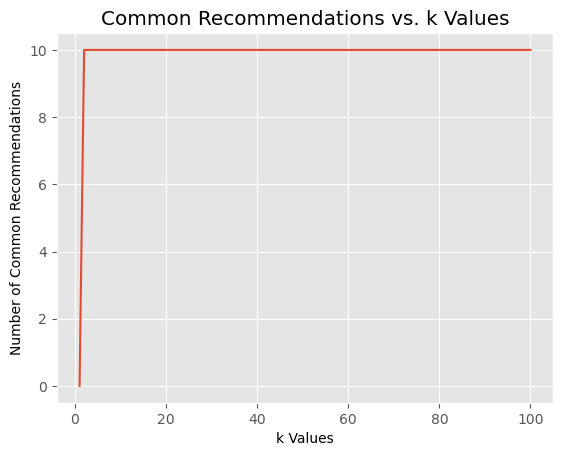

In [27]:
# Calculate the number of common recommendations between consecutive k values
common_recommendations_count = {}
prev_recommendations = set()

for k_test in k_values:
    current_recommendations = set(common_recommendations[k_test])
    common_count = len(prev_recommendations.intersection(current_recommendations))
    common_recommendations_count[k_test] = common_count
    prev_recommendations = current_recommendations

# Plot the results
plt.plot(k_values, list(common_recommendations_count.values()))
plt.xlabel("k Values")
plt.ylabel("Number of Common Recommendations")
plt.title("Common Recommendations vs. k Values")
plt.show()